# Reducing Traffic Mortality Project

## Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Import the linear Regression Algo
from sklearn.linear_model import LinearRegression

# Standardize feature columns
from sklearn.preprocessing import StandardScaler

# Import the PCA To reduce dimentionality reduction
from sklearn.decomposition import PCA

# Importing KMeans Algo
from sklearn.cluster import KMeans

#warning
import warnings
warnings.filterwarnings('ignore')

## The raw data files and their format

While the rate of fatal road accidents has been decreasing steadily since the 80s, the past ten years have seen a stagnation in this reduction. Coupled with the increase in number of miles driven in the nation, the total number of traffic related-fatalities has now reached a ten year high and is rapidly increasing.

Per request of the US Department of Transportation, we are currently investigating how to derive a strategy to reduce the incidence of road accidents across the nation. By looking at the demographics of traﬃc accident victims for each US state, we find that there is a lot of variation between states. Now we want to understand if there are patterns in this variation in order to derive suggestions for a policy action plan. In particular, instead of implementing a costly nation-wide plan we want to focus on groups of states with similar profiles. How can we find such groups in a statistically sound way and communicate the result effectively?

To accomplish these tasks, we will make use of data wrangling, plotting, dimensionality reduction, and unsupervised clustering.

The data given to us was originally collected by the National Highway Traffic Safety Administration and the National Association of Insurance Commissioners.


We can do this using pandas.

In [6]:
road_acc_df = pd.read_csv("road-accidents.csv")
road_acc_df

,##### LICENSE #####
0,# This data set is modified from the original ...
1,# and it is released under CC BY 4.0 (https://...
2,##### COLUMN ABBREVIATIONS #####
3,# drvr_fatl_col_bmiles = Number of drivers inv...
4,# perc_fatl_speed = Percentage Of Drivers Invo...
5,# perc_fatl_alcohol = Percentage Of Drivers In...
6,# perc_fatl_1st_time = Percentage Of Drivers I...
7,##### DATA BEGIN #####
8,state|drvr_fatl_col_bmiles|perc_fatl_speed|per...
9,Alabama|18.8|39|30|80


##### We can notice that there are some comments in our dataframe which illustrate our data as for:

->> License

- This data set is modified from the original at fivethirtyeight (https://github.com/fivethirtyeight/data/tree/master/bad-drivers) and it is released under CC BY 4.0 (https://creativecommons.org/licenses/by/4.0/)

->> Columns abbreviation

- drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)
- perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)
- perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)
- perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)

->> The seperator of our data is |

## Reading and getting an overview of the data

In [9]:
road_acc_df = pd.read_csv("road-accidents.csv", delimiter='|', comment='#')

In [10]:
road_acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [11]:
road_acc_df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


## Create a textual and a graphical summary of the data

We now have an idea of what the dataset looks like. To further familiarize ourselves with this data, we will calculate summary statistics and produce a graphical overview of the data.

The graphical overview is good to get a sense for the distribution of variables within the data and could consist of one histogram per column. It is often a good idea to also explore the pairwise relationship between all columns in the data set by using a using pairwise scatter plots (sometimes referred to as a "scatterplot matrix")

In [12]:
road_acc_df.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


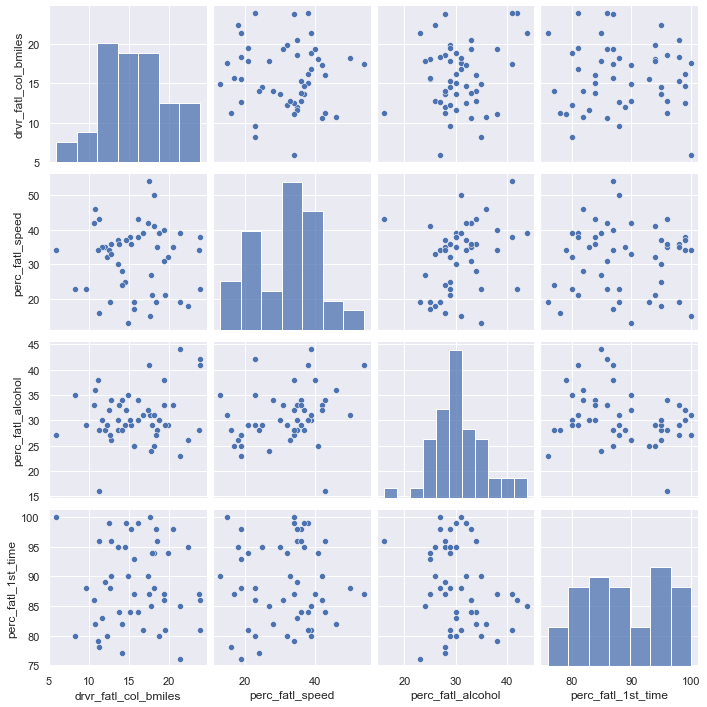

In [13]:
# plotting our data
sns.pairplot(road_acc_df)

## Quantify the association of features and accidents

We can already see some potentially interesting relationships between the target variable (the number of fatal accidents) and the feature variables (the remaining three columns).
To quantify the pairwise relationships that we observed in the scatter plots, we can compute the Pearson correlation coefficient matrix. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:

- 0.2 = weak
- 0.5 = medium
- 0.8 = strong
- 0.9 = very strong

<AxesSubplot:>

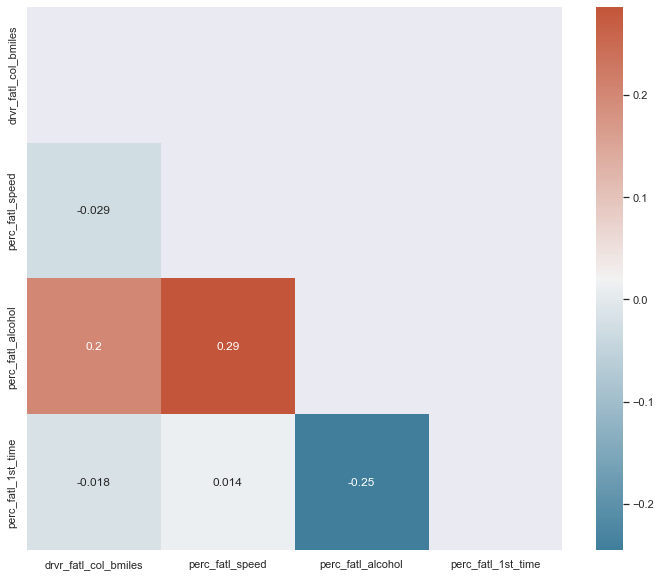

In [15]:
# Compute the correlation coefficent for all column pairs
corr = road_acc_df.corr()

# Setting up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

So, we can compute that there is a strong correlation between:

- the feature perc_fatl_alchohol and the target drvr_fatl_col_bmiles (0.2)
- the feature perc_fatl_alchohol and the feature perc_fatl_1st_time (-0.25)
- the feature perc_fatl_alchohol and the feature perc_fatl_speed (0.29)

All the four features give us meaningfull values

## Fit a multivariate linear regression Model

In [16]:
# splitting our data to features and target DataFrames
features = road_acc_df.iloc[:,2:5]
target = road_acc_df.iloc[:,1]

In [17]:
# Create a linear regression object
reg = LinearRegression()

In [18]:
# Fitting linear regression model
reg.fit(features,target)

LinearRegression()

In [19]:
# Retrieve the regression coefficients
print(f"- Correlation Coefficient of {features.columns[0]} is {reg.coef_[0]:.4f}\n- Correlation Coefficient of {features.columns[1]} is {reg.coef_[1]:.4f}\n- Correlation Coefficient of {features.columns[2]} is {reg.coef_[2]:.4f}")

- Correlation Coefficient of perc_fatl_speed is -0.0418
- Correlation Coefficient of perc_fatl_alcohol is 0.1909
- Correlation Coefficient of perc_fatl_1st_time is 0.0247


## Perform PCA on standardized data

We have learned that alcohol consumption is weakly associated with the number of fatal accidents across states. This could lead us to conclude that alcohol consumption should be a focus for further investigations and maybe strategies should divide states into high versus low alcohol consumption in accidents. But there are also associations between alcohol consumptions and the other two features, so it might be worth trying to split the states in a way that accounts for all three features.


One way of clustering the data is to use PCA to visualize data in reduced dimensional space where we can try to pick up patterns by eye. PCA uses the absolute variance to calculate the overall variance explained for each principal component, so it is important that the features are on a similar scale (unless we would have a particular reason that one feature should be weighted more).


We'll use the appropriate scaling function to standardize the features to be centered with mean 0 and scaled with standard deviation 1.

([<matplotlib.axis.XTick at 0x210cca5f9a0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

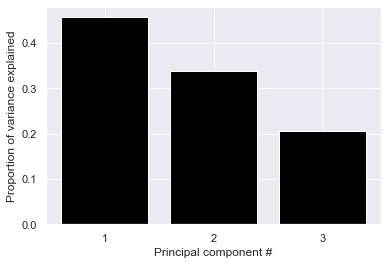

In [21]:
# Standardize and center the feature columns
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform PCA to make dimensionality reduction 
pca = PCA()

# Fit the standardized data to the pca
pca=pca.fit(features_scaled)

# Plot the proportion of variance explained on the y-axis of the bar plot
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_, color='black')
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

In [22]:
# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

The cumulative variance of the first two principal components is 0.7947


We notice that most of cumlative variance is achieved by reducing the features from 3 to 2

## Visualize the first two principal components

The first two principal components enable visualization of the data in two dimensions while capturing a high proportion of the variation (79%) from all three features: speeding, alcohol influence, and first-time accidents. This enables us to use our eyes to try to discern patterns in the data with the goal to find groups of similar states. Although clustering algorithms are becoming increasingly efficient, human pattern recognition is an easily accessible and very efficient method of assessing patterns in data.

We will create a scatter plot of the first principle components and explore how the states cluster together in this visualization.

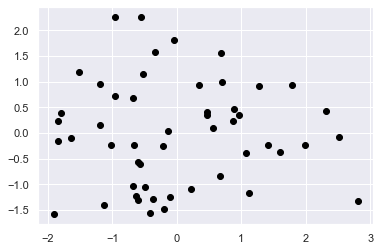

In [23]:
# Transform the scaled features using two principal components
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)

# Plot the first two principal components in a scatter plot
plt.scatter(p_comps[:,0],p_comps[:,1], color="black")

The last graph shows that we can divide our data into 3 clusters or more by inspection

## Find clusters of similar states in the data

It was not entirely clear from the PCA scatter plot how many groups in which the states cluster. To assist with identifying a reasonable number of clusters, we can use KMeans clustering by creating a scree plot and finding the elbow, which is an indication of when the addition of more clusters does not add much explanatory power.

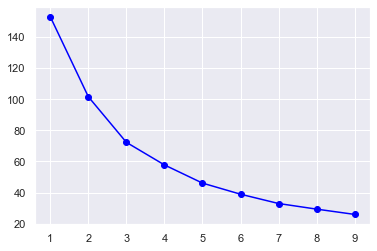

In [29]:
# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    # Number of time the k-means algorithm will be run with different centroid seeds equals to 50
    km = KMeans(n_clusters=k, random_state=8, n_init=50)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o', color="blue")

## KMeans to visualize clusters in the PCA scatter plot

Since there wasn't a clear elbow in the scree plot, assigning the states to either two or three clusters is a reasonable choice, and we will resume our analysis using three clusters. Let's see how the PCA scatter plot looks if we color the states according to the cluster to which they are assigned.

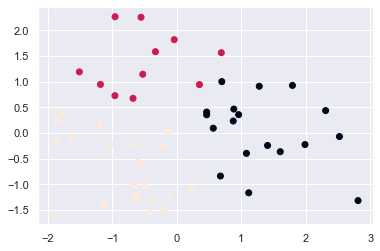

In [30]:
# Create a KMeans object with 3 clusters, use random_state=8 
km = KMeans(n_clusters=3,random_state=8)

# Fit the data to the `km` object
km=km.fit(features_scaled)

# Create a scatter plot of the first two principal components
plt.scatter(p_comps[:,0],p_comps[:,1],c=km.labels_)
# and color it according to the KMeans cluster assignment 

## Visualize the feature differences between the clusters

Thus far, we have used both our visual interpretation of the data and the KMeans clustering algorithm to reveal patterns in the data, but what do these patterns mean?

Remember that the information we have used to cluster the states into three distinct groups are the percentage of drivers speeding, under alcohol influence and that has not previously been involved in an accident. We used these clusters to visualize how the states group together when considering the first two principal components. This is good for us to understand structure in the data, but not always easy to understand, especially not if the findings are to be communicated to a non-specialist audience.

A reasonable next step in our analysis is to explore how the three clusters are different in terms of the three features that we used for clustering. Instead of using the scaled features, we return to using the unscaled features to help us interpret the differences.

<AxesSubplot:xlabel='percent', ylabel='measurement'>

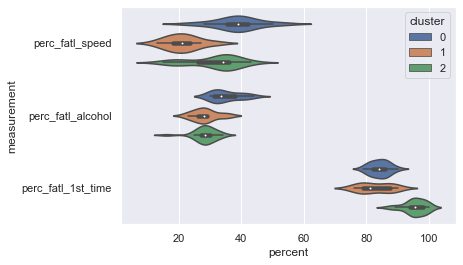

In [33]:
# Create a new column with the labels from the KMeans clustering
road_acc_df['cluster'] = km.labels_

# Reshape the DataFrame to the long format
road_melt = pd.melt(road_acc_df, id_vars="cluster", var_name="measurement", value_name="percent", value_vars=features)

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(x=road_melt["percent"], y=road_melt["measurement"], hue=road_melt["cluster"])

## Compute the number of accidents within each cluster

Now it is clear that different groups of states may require different interventions. Since resources and time are limited, it is useful to start off with an intervention in one of the three groups first. Which group would this be? To determine this, we will include data on how many miles are driven in each state, because this will help us to compute the total number of fatal accidents in each state. Data on miles driven is available in another tab-delimited text file. We will assign this new information to a column in the DataFrame and create a violin plot for how many total fatal traffic accidents there are within each state cluster.

<AxesSubplot:xlabel='cluster', ylabel='num_drvr_fatl_col'>

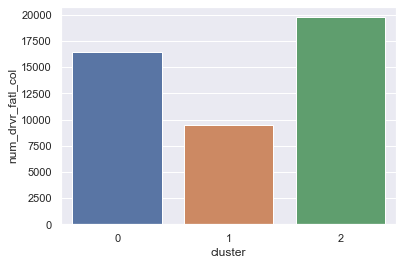

In [39]:
# Read in the new dataset
miles_driven = pd.read_csv('miles-driven.csv', sep='|')

# Merge the `car_acc` DataFrame with the `miles_driven` DataFrame
road_acc_miles = pd.merge(road_acc_df,miles_driven, on="state")

# Create a new column for the number of drivers involved in fatal accidents
road_acc_miles['num_drvr_fatl_col'] = road_acc_miles['drvr_fatl_col_bmiles']*road_acc_miles["million_miles_annually"]/1000
# Create a barplot of the total number of accidents per cluster
sns.barplot(x=road_acc_miles["cluster"], y=road_acc_miles["num_drvr_fatl_col"], data=road_acc_miles, estimator=sum,ci=None)

In [38]:
# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = road_acc_miles.groupby("cluster")["num_drvr_fatl_col"].agg(["count", "mean", "sum"])
count_mean_sum

,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


## Make a decision when there is no clear right choice

As we can see, there is no obvious correct choice regarding which cluster is the most important to focus on. Yet, we can still argue for a certain cluster and motivate this using our findings above. Which cluster do you think should be a focus for policy intervention and further investigation?

The best answer is cluster 2 > cluster 0 > cluster 1